## **SECTION 1 -> INTRODUCTION**

-> **INTRODUCTION:**

This project applies linear regression techniques to real-world financial data to examine the relationship between key company financial indicators and corporate revenue. Using a dataset titled Global Financial Giants by Revenue 2024, which contains financial and structural information for major global companies, this project aims to predict company revenue using core financial indicators and categorical business attributes to support financial performance analysis.

The dataset includes numerical variables such as net income and total assets, as well as categorical variables such as industry and headquarters location. These features provide a realistic setting for building a multiple linear regression model that reflects how financial performance and organizational characteristics relate to revenue generation.

Linear regression is appropriate for this analysis because the target variable—revenue—is continuous and is influenced by multiple explanatory variables. Beyond prediction, this project emphasizes understanding the assumptions, interpretability, and limitations of linear regression models in a financial context. The primary goal is to deepen practical understanding of the end-to-end linear regression workflow, including data exploration, preprocessing, model construction, evaluation, and interpretation.

### Importing Required Libraries

This section imports the core Python libraries required for data manipulation, visualization, and machine learning. These libraries provide the functionality needed for handling tabular data, performing numerical computations, building and evaluating a linear regression model, and constructing preprocessing pipelines. Importing all required libraries at the beginning of the notebook ensures a consistent and reproducible workflow throughout the project.

In [96]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV


## **SECTION 2 -> Data Preparation/Wrangling**

### Dataset Loading

In this section, the dataset containing financial information on global companies is loaded into the analysis environment. The data is read from a CSV file and stored in a pandas DataFrame, which will serve as the primary data structure for exploration, preprocessing, and modeling throughout the project.

In [97]:
#reading the csv file
df = pd.read_csv("linear regression project 0/largest financial services companies by revenue.csv" )

#first five rows in the dataset
df.head()

,Rank,Company,Industry,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China


### Dataset Overview and Structure

In this section, we perform an initial inspection of the dataset to understand its overall structure.  
This includes examining the number of observations and features, as well as the data types and presence of missing values across columns.

Understanding the dataset structure at this stage helps identify potential data quality issues and informs decisions for data cleaning and preprocessing in later stages.


In [98]:
#dataset overview/structure
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            50 non-null     int64 
 1   Company                         50 non-null     object
 2   Industry                        50 non-null     object
 3   Revenue in (USD Million)        50 non-null     int64 
 4   Net Income in (USD Millions)    50 non-null     int64 
 5   Total Assest in (USD Millions)  50 non-null     int64 
 6   Headquarters                    50 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


#### Interpretation

The dataset contains 50 observations and 7 columns, representing major global financial companies and their key financial attributes.

Based on the data types, the numerical variables include:
- Rank
- Revenue (USD millions)
- Net Income (USD millions)
- Total Assets (USD millions)

The object-type columns include:
- Company
- Industry
- Headquarters

While `industry` and `headquarters` represent meaningful categorical features, the `company` column serves primarily as a unique identifier and is not suitable for use as a predictive feature.

No missing values were observed across any columns, indicating that missing-value imputation will not be required. However, some variables will require preprocessing decisions, such as feature exclusion and categorical encoding, in later stages.

In [99]:
#statistical summary
df.describe()

,Rank,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions)
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,85435.120000,9369.320000,1480.46000
std,14.57738,44689.154251,11101.187832,1282.83769
min,1.00000,14592.000000,169.000000,13.00000
25%,13.25000,56189.250000,3030.250000,588.00000
50%,25.50000,70736.000000,4963.000000,1024.50000
75%,37.75000,96284.250000,10660.750000,2183.75000
max,50.00000,245510.000000,45783.000000,5110.00000


#### Interpretation of Statistical Summary

The statistical summary provides an overview of the distributions of numerical variables in the dataset: rank, revenue, net income, and total assets.

**Rank:**  
- The ranks range from 1 to 50 with a mean of 25.5, reflecting a uniform distribution across the companies.  
- The 25th percentile is 13.25 and the 75th percentile is 37.75, showing that companies are evenly spread across the ranking scale.

**Revenue (USD millions):**  
- Revenue ranges from approximately 14,592 million to 245,510 million.  
- The mean revenue is 85,435 million, with a standard deviation of about 44,689 million, indicating significant variability across companies.  
- The 25th percentile is ~56,189, the median (50th percentile) is ~70,736, and the 75th percentile is ~96,284, showing that most companies cluster in the mid-range, but a few very large companies create a right-skewed distribution.

**Net Income (USD millions):**  
- Net income ranges from ~169 million to ~45,783 million.  
- The mean is ~9,369 million with a standard deviation of ~11,101 million, indicating large differences in profitability.  
- Percentiles show a similar right-skewed pattern, with most companies having net income below the mean, while a few outliers have very high net income.

**Total Assets (USD millions):**  
- Total assets range from ~13 million to ~5,110 million.  
- The mean is ~1,480 million with a standard deviation of ~1,283 million, reflecting a wide spread in company size.  
- Percentile analysis shows that most companies have assets in the lower half of the range, with a few extremely large companies driving up the maximum value.

**Overall observations:**  
- The numerical variables exhibit high variability and right-skewed distributions, which is common in financial datasets where a few large companies dominate.  
- These observations will guide feature selection, scaling, and interpretation when building the linear regression model.  
- No missing values are present, so imputation is not necessary, but careful attention to feature scaling and skewness will be important in the modeling phase.


### Unique Categories in Categorical Features

This cell examines the number of unique categories in each categorical feature using the `.nunique()` method.  

Understanding the count of unique categories helps us determine how manageable these features are for encoding and whether any special grouping may be required.


In [100]:
# number of unique values
df[["Industry", "Headquarters"]].nunique()

Industry         4
Headquarters    11
dtype: int64

#### Interpretation of Output
 * `Industry` has 4 unique categories: Banking, Insurance, Investment Services, and Conglomerate.
 * `Headquarters` has 11 unique categories, representing different countries.
 * Both columns have a manageable number of categories, so encoding them later will be straightforward.
 * No preprocessing is required at this stage to reduce category count.

### Frequency Distribution of Categorical Features

This cell displays the frequency of each category within the categorical features using the `.value_counts()` method.  

Frequency analysis helps identify dominant categories, rare categories, and potential imbalances that may affect modeling or require special preprocessing considerations.


In [101]:
#value counts
df[["Industry", "Headquarters"]].value_counts()

Industry             Headquarters  
Banking              China             9
Insurance            China             5
Investment Services  United States     5
Banking              United States     4
Insurance            Germany           3
                     Japan             3
                     United States     3
                     United Kingdom    3
Banking              United Kingdom    2
Insurance            Canada            2
Banking              France            2
Investment Services  Canada            1
Insurance            Switzerland       1
Banking              Japan             1
Insurance            Italy             1
                     India             1
Banking              Spain             1
                     India             1
Conglomerate         United States     1
Insurance            France            1
Name: count, dtype: int64

#### Interpretation of Output
 * `Industry`:

    * The most common industry is Banking.

    * Insurance is the second most frequent.

    * Investment Services occurs less frequently but is not rare.

    * Conglomerate is very rare (only 1 entry).

 * `Headquarters` :

    * The most frequent country is China, mainly because it hosts multiple banking headquarters.

    * The United States has the rarest occurrence in this dataset (for Conglomerate).

    * These insights confirm that most categories are well-represented, though very rare categories (like Conglomerate) may need consideration during encoding.

### Defining the Target and Predictor Variables

In any supervised machine learning project, it is crucial to clearly define **what we are trying to predict** (the target variable) and **what information we will use to make the prediction** (the predictor variables).

**Target Variable:** `Revenue (USD millions)`  
- The target variable is the main outcome we want to predict.  
- In this dataset, `Revenue` represents the total income generated by each company from its business operations.  
- Predicting revenue is a common and practical task in financial data analysis, as it helps businesses understand company size, market trends, and performance expectations.  
- Revenue is numerical and continuous, which makes it suitable for linear regression modeling.

**Predictor Variables:**  
- **Numerical predictors:**  
  - `Net Income (USD millions)` – represents company profitability and is often correlated with revenue.  
  - `Total Assets (USD millions)` – represents the total resources owned by the company, which can indicate its capacity to generate revenue.  
- **Categorical predictors:**  
  - `Industry` – represents the sector in which a company operates (e.g., Banking, Insurance). Different industries can affect revenue patterns.  
  - `Headquarters` – represents the country where the company is based. Geographic location can influence revenue due to market size and economic factors.  

**Columns excluded from modeling:**  
- `Company` – each company is unique and serves as an identifier, not a predictor.  
- `Rank` – this is derived from revenue, so including it would artificially give the model information about the target, which should be avoided.  

**Summary:**  
We will use `Net Income` and `Total Assets` as numerical predictors, and `Industry` and `Headquarters` as categorical predictors. Our linear regression model will use these predictors to estimate the revenue for each company in the dataset.  

This setup ensures that the model focuses on meaningful information while avoiding variables that could bias the results or leak target information.


### Preprocessing and Data Cleaning Plan

Before building the linear regression model, we will prepare the dataset to ensure it is clean, numeric, and ready for modeling.

1. **Remove irrelevant columns:** `Company` and `Rank` will be dropped as they do not provide independent predictive information.

2. **Verify numerical predictors:** `Net Income` and `Total Assets` will be checked for correct data types and extreme values.

3. **Encode categorical predictors:** `Industry` and `Headquarters` will be converted to numeric columns using one-hot encoding, making them suitable for linear regression.

4. **Scale numerical features (optional):** Consider standardizing `Net Income` and `Total Assets` to improve interpretability of model coefficients.

5. **Final verification:** Ensure no missing values remain, all columns are in the correct format, and the dataset shape aligns with expectations.


In [102]:
#handling identifiers and removing irrelevant columns
df.drop(columns=["Company","Rank"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Industry                        50 non-null     object
 1   Revenue in (USD Million)        50 non-null     int64 
 2   Net Income in (USD Millions)    50 non-null     int64 
 3   Total Assest in (USD Millions)  50 non-null     int64 
 4   Headquarters                    50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [103]:
#Verify numerical predictors
print("dtype of net income = ", df["Net Income in (USD Millions)"].dtype)print("dtype of total assets = ", df["Total Assest in (USD Millions)"].dtype)


dtype of net income =  int64
dtype of total assets =  int64


In [104]:
#Encode categorical variables
#select categorical columns to encode
categorical_cols = ["Industry", "Headquarters"]

#Perform one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#glimpsing into our encoded dataset
df_encoded.head()

,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Industry_Conglomerate,Industry_Insurance,Industry_Investment Services,Headquarters_China,Headquarters_France,Headquarters_Germany,Headquarters_India,Headquarters_Italy,Headquarters_Japan,Headquarters_Spain,Headquarters_Switzerland,Headquarters_United Kingdom,Headquarters_United States
0,245510,42521,873,True,False,False,False,False,False,False,False,False,False,False,False,True
1,191509,20738,1460,False,True,False,True,False,False,False,False,False,False,False,False,False
2,182794,45783,5110,False,False,False,True,False,False,False,False,False,False,False,False,False
3,172000,39282,4311,False,False,False,True,False,False,False,False,False,False,False,False,False
4,153884,31293,4169,False,False,False,True,False,False,False,False,False,False,False,False,False


In [105]:
#Scale numerical features
#Select the numerical columns to scale
numerical_col = ["Net Income in (USD Millions)", "Total Assest in (USD Millions)"]

#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler and transform the numerical columns
df_encoded[numerical_col] = scaler.fit_transform(df_encoded[numerical_col])

#Inspect the scaled values
df_encoded.head()

,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Industry_Conglomerate,Industry_Insurance,Industry_Investment Services,Headquarters_China,Headquarters_France,Headquarters_Germany,Headquarters_India,Headquarters_Italy,Headquarters_Japan,Headquarters_Spain,Headquarters_Switzerland,Headquarters_United Kingdom,Headquarters_United States
0,245510,3.016637,-0.478336,True,False,False,False,False,False,False,False,False,False,False,False,True
1,191509,1.034493,-0.016111,False,True,False,True,False,False,False,False,False,False,False,False,False
2,182794,3.313463,2.858030,False,False,False,True,False,False,False,False,False,False,False,False,False
3,172000,2.721904,2.228869,False,False,False,True,False,False,False,False,False,False,False,False,False
4,153884,1.994945,2.117053,False,False,False,True,False,False,False,False,False,False,False,False,False


In [106]:
#Check column data types
df_encoded.dtypes

#Check column data types
df_encoded.isnull().sum()

#check the shape of the dataframe
df_encoded.shape

#Display first few rows to inspect the final dataset
df_encoded.head()

,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Industry_Conglomerate,Industry_Insurance,Industry_Investment Services,Headquarters_China,Headquarters_France,Headquarters_Germany,Headquarters_India,Headquarters_Italy,Headquarters_Japan,Headquarters_Spain,Headquarters_Switzerland,Headquarters_United Kingdom,Headquarters_United States
0,245510,3.016637,-0.478336,True,False,False,False,False,False,False,False,False,False,False,False,True
1,191509,1.034493,-0.016111,False,True,False,True,False,False,False,False,False,False,False,False,False
2,182794,3.313463,2.858030,False,False,False,True,False,False,False,False,False,False,False,False,False
3,172000,2.721904,2.228869,False,False,False,True,False,False,False,False,False,False,False,False,False
4,153884,1.994945,2.117053,False,False,False,True,False,False,False,False,False,False,False,False,False


## **SECTION 3 -> Data Visualization/Model Assumption**

### Data Visualization Plan

Visualization helps us understand the patterns, distributions, and relationships in our dataset before building the mode

1. **Numerical Features**
   - Use histograms to examine the distribution of `Revenue`, `Net Income`, and `Total Assets`.
   - Use boxplots to detect outliers in numerical predictors.
   - Use scatter plots to visualize relationships between predictors and the target variable `Recal variables.


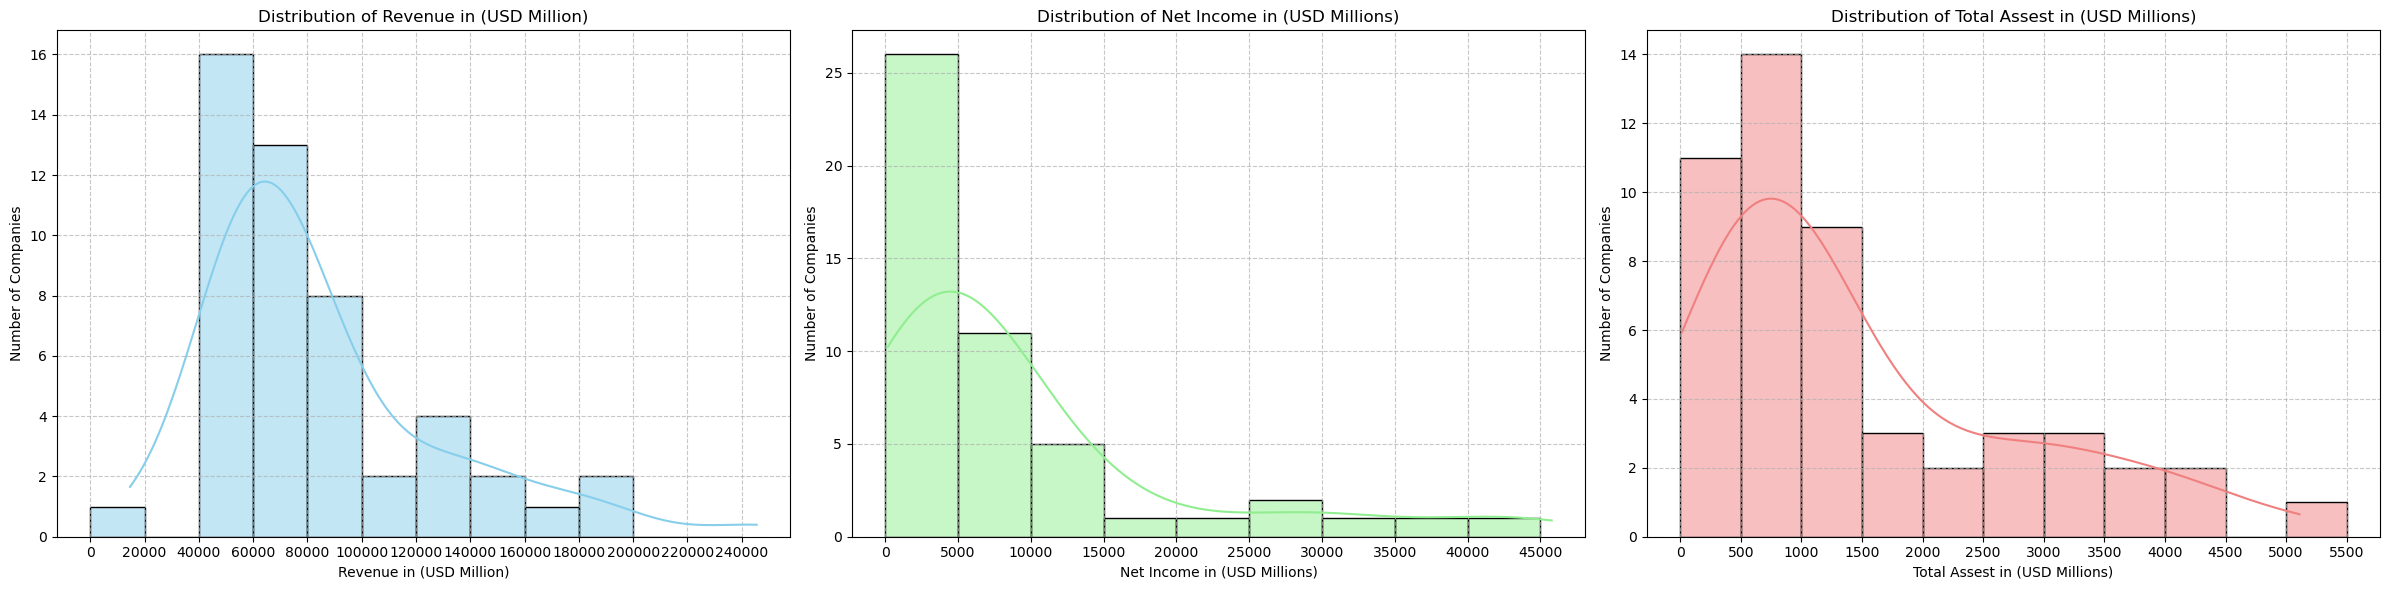

In [107]:
#histograms to examine the distribution of Revenue, Net Income, and Total Assets.
fig, axes = plt.subplots(1, 3, figsize=(24,6))

numeric_cols = ['Revenue in (USD Million)', 'Net Income in (USD Millions)', 'Total Assest in (USD Millions)']
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Custom x-axis ticks for each numeric feature
x_ticks = [
    list(range(0, 260000, 20000)),   # Revenue
    list(range(0, 50000, 5000)),     # Net Income
    list(range(0, 6000, 500))        # Total Assets
]

for i, col in enumerate(numeric_cols):
     sns.histplot(
        df[col], 
        bins=x_ticks[i], 
        kde=True,              # <--- adds the smooth KDE line
        color=colors[i], 
        edgecolor='black', 
        ax=axes[i]
     )
     axes[i].set_title(f'Distribution of {col}')
     axes[i].set_xlabel(col)
     axes[i].set_ylabel('Number of Companies')
     axes[i].set_xticks(x_ticks[i])  # <--- set the x-axis ticks explicitly
     axes[i].grid(True, linestyle='--', alpha=0.7)  # <--- adds gridlines


plt.tight_layout()
plt.show()


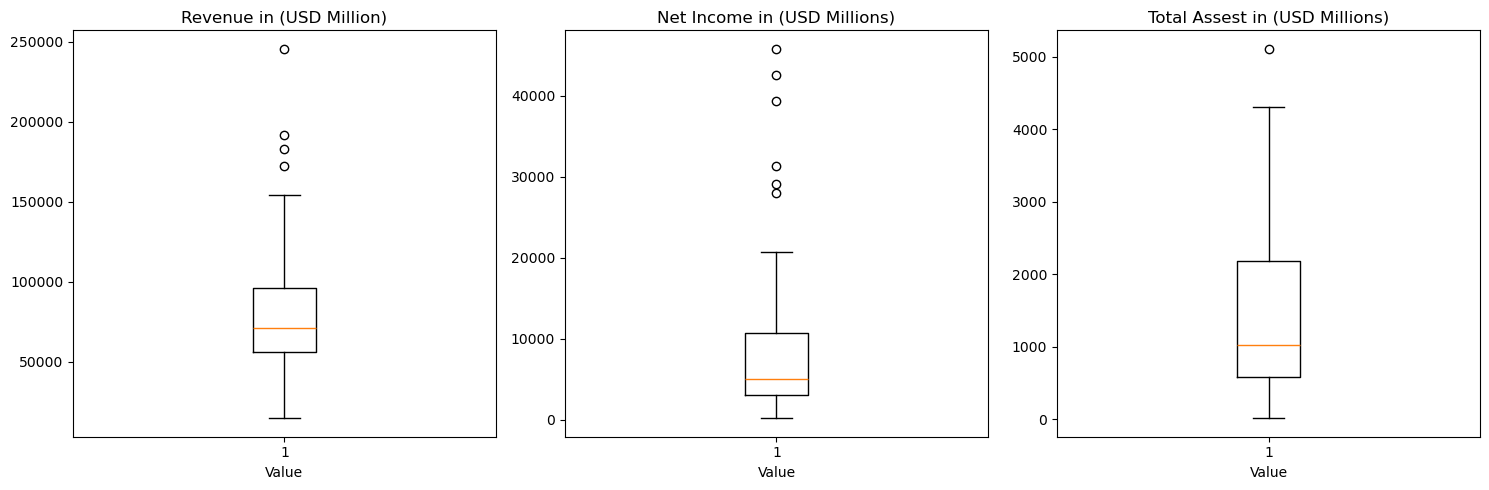

In [108]:
#boxplots to detect outliers in numerical predictors.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")


plt.tight_layout()
plt.show()

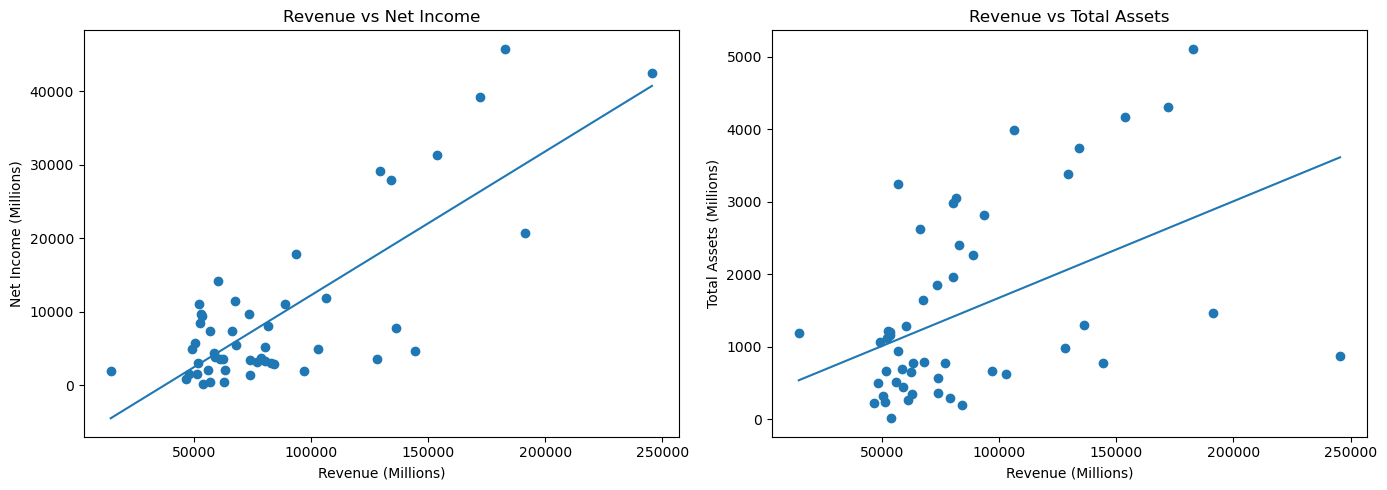

In [109]:
#---Scatter Plots of Revenue vs Numerical Predictors---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define predictors and labels
predictors = [
    ("Net Income in (USD Millions)", "Net Income (Millions)", "Revenue vs Net Income"),
    ("Total Assest in (USD Millions)", "Total Assets (Millions)", "Revenue vs Total Assets")
]

x = df["Revenue in (USD Million)"]

for i, (y_col, y_label, title) in enumerate(predictors):
    y = df[y_col]

    #scatterplot
    axes[i].scatter(x, y, marker='o')

    #regression line
    m, b = np.polyfit(x, y, 1)
    axes[i].plot(x, m*x + b)

    #labels and title
    axes[i].set_xlabel("Revenue (Millions)")
    axes[i].set_ylabel(y_label)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()


### 📊 Interpretation of Numerical Visualizations
* #### Revenue and Profitability (Revenue vs Net Income)

The relationship between revenue and net income shows a clear upward trend(POSITIVE RELATIONSHIP). In simple terms, companies that generate higher revenue generally make more profit. This is expected from a business standpoint, as revenue growth often supports profitability.

However, the spread in net income increases as revenue grows. This tells us that high revenue does not guarantee high profit. Some large companies convert revenue to profit more efficiently than others, likely due to differences in cost management, pricing strategies, or operational efficiency. From a business perspective, this highlights the importance of focusing not just on growth, but also on profit margins and cost control.

* #### Revenue and Company Size (Revenue vs Total Assets)

There is also a positive relationship between revenue and total assets. Larger companies, in terms of assets, tend to generate higher revenue, which suggests that scale and investment in assets play a role in revenue generation.

That said, the variability in the plot indicates that owning more assets does not always translate into proportionally higher revenue. Some firms are clearly using their assets more efficiently than others. For decision-makers, this points to the need to evaluate asset utilization and return on assets, not just asset size.

* #### Revenue Distribution

The revenue distribution is right-skewed. Most companies fall within the lower to mid-range of revenue, while a small number of firms generate extremely high revenue. This indicates that the market is made up largely of mid-sized players, with a few dominant organizations at the top.

From a business perspective, these high-revenue companies may significantly influence market trends, competitive pressure, and industry benchmarks.

* #### Net Income Distribution

Net income follows a similar pattern, where most companies earn moderate profits and only a few generate exceptionally high earnings. This reinforces the idea that profitability is unevenly distributed across firms.

This insight is important for benchmarking, as it shows that exceptional profitability is achieved by only a small subset of companies, often due to strategic advantages or superior operational execution.

* #### Total Assets Distribution

The distribution of total assets follows a similar right-skewed pattern which shows that most firms operate with relatively smaller asset bases, while a few hold very large asset portfolios. This reflects differences in business models and capital intensity across organizations.

For leadership teams, this suggests that growth strategies can vary — some companies scale through asset expansion, while others grow revenue without heavy asset investment.

* #### Box Plot Summary

The box plots reinforce the distributional findings:

- Medians lie closer to the lower quartiles

- Upper tails are elongated

- Several high-value outliers are present

These characteristics are typical in financial datasets and reflect natural firm-level heterogeneity rather than data issues.

#### Key Business Takeaways

Overall, the visualizations show that:

- Revenue growth generally supports profitability, but efficiency matters

- Larger companies tend to earn more, but scale alone does not ensure success

- A small number of firms dominate the upper end of revenue, profit, and assets

- Business performance varies widely, making efficiency metrics critical for deeper analysis

These insights provide a strong foundation for further business evaluation, such as profitability ratios, efficiency analysis, or strategic benchmarking.

**2. Categorical Features**
   - Use bar charts to show the frequency of each category in `Industry` and `Headquarters`.
   - Use boxplots grouped by `Industry` or `Headquarters` to compare revenue distributions across sectors.

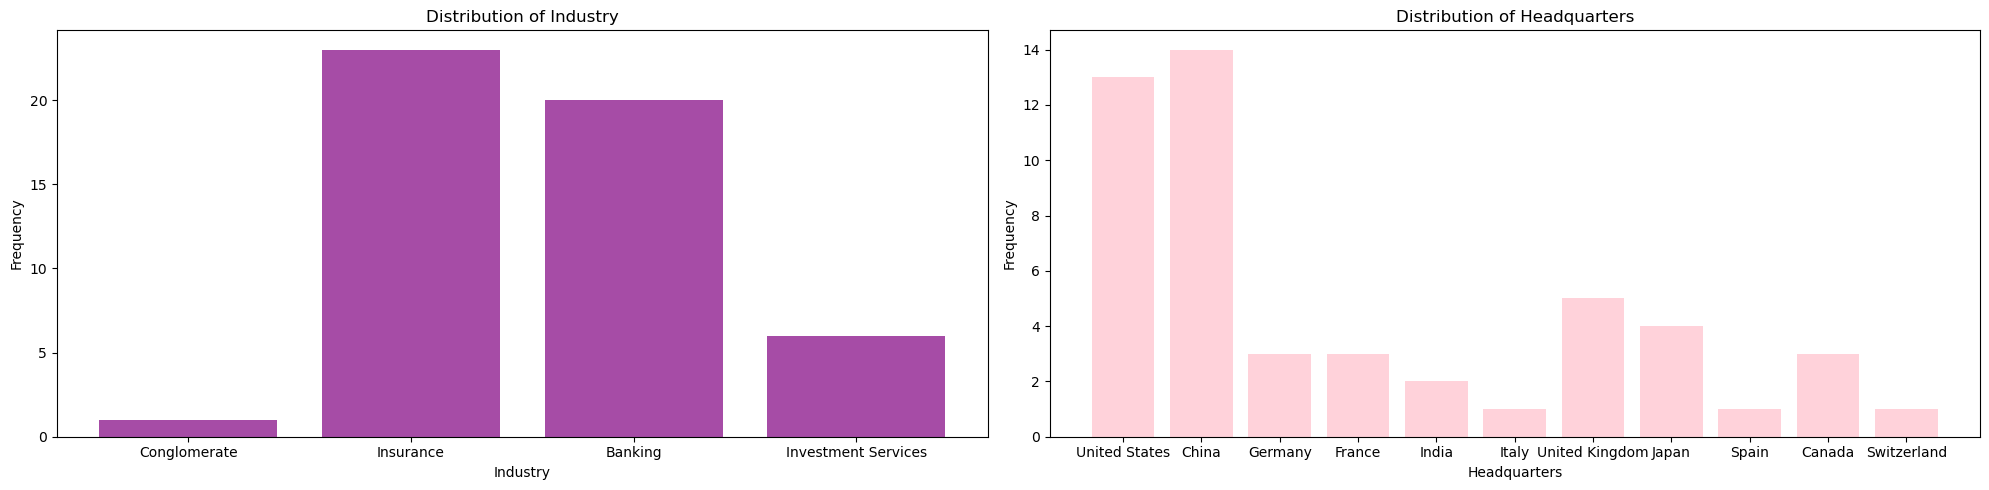

In [110]:
# ---bar charts to show the frequency of each category in `Industry` and `Headquarters`---
#count frequency of each industry
colors = ["purple", "pink"]
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 5))

for i, col in enumerate(categorical_cols):
    data = df[col]
    unique_vals = data.unique()

    counts = []
    for val in unique_vals:
        count = ((data == val).sum())
        counts.append(count)
        
    axes[i].bar(unique_vals, counts, color = colors[i], alpha = 0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Categorical Feature Distribution: Industry and Headquarters

The bar charts illustrate the frequency distribution of the categorical features Industry and Headquarters.

From the Industry bar chart, it is evident that the dataset is dominated by the Insurance and Banking sectors, followed by Investment Services, while Conglomerates are minimally represented. This indicates an imbalanced distribution across industries, which is important to consider during modeling, as dominant categories may have a stronger influence on model learning.

The Headquarters bar chart shows a high-cardinality categorical feature, with companies spread across many countries, most of which have very low frequencies. Only a few countries (such as the United States and China) appear more than a handful of times.

Key Insight:
While Industry presents a manageable number of categories with clear business meaning, Headquarters contains too many sparse categories, making it less suitable for comparative analysis at this stage.

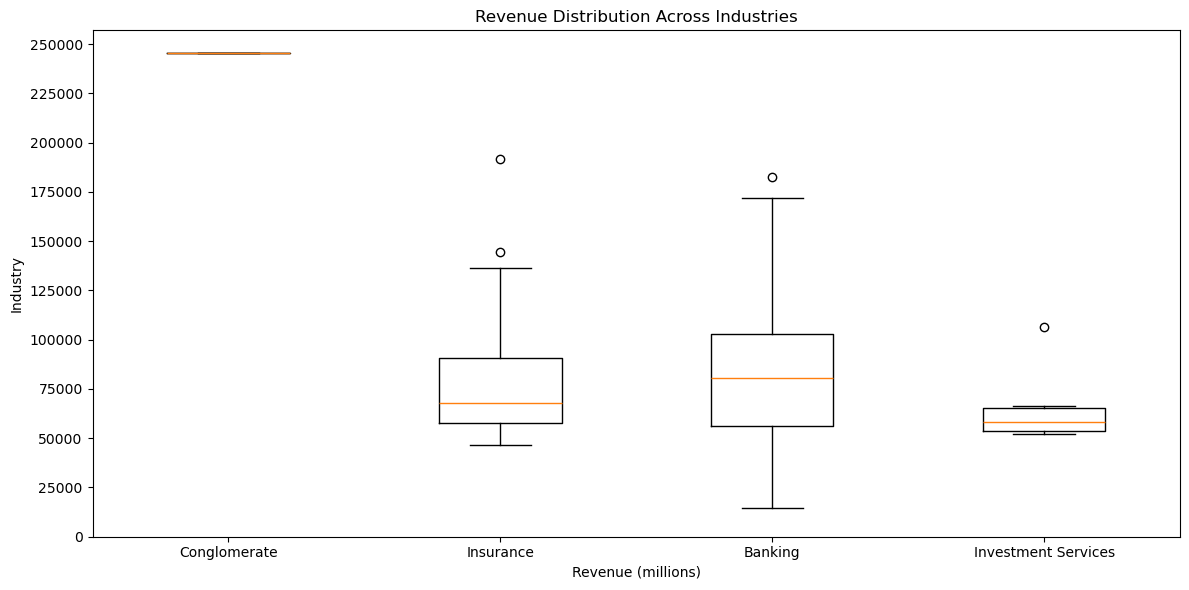

In [111]:
# --- boxplots grouped by `Industry`---
industries = df["Industry"].unique()

revenue_industry = []

for ind in industries:
    revenue_industry.append(df[df["Industry"] == ind]["Revenue in (USD Million)"])

plt.figure(figsize=(12, 6))
plt.boxplot(revenue_industry, labels=industries, vert=True)

plt.xlabel("Revenue (millions)")
plt.ylabel("Industry")
plt.title("Revenue Distribution Across Industries")
plt.yticks(np.arange(0, 260000, 25000))

plt.tight_layout()
plt.show()

#### Revenue Distribution Across Industries (Box Plot)

The box plot visualizes Revenue distribution grouped by Industry, allowing comparison of central tendency, spread, and outliers across sectors.

Industry was chosen over Headquarters for this comparison for several reasons:

- Industry categories are few, well-defined, and economically meaningful, making comparisons interpretable.

- Each industry group has a sufficient number of observations to support distributional analysis.

- Revenue behavior is expected to vary structurally across industries due to differences in business models.

In contrast, Headquarters was not used for the box plot because:

- It contains many categories with very few observations.

- Grouping revenue by country would result in fragmented distributions and unreliable comparisons.

- Geographic location does not directly explain revenue magnitude in this dataset as strongly as industry classification.

Observed Patterns:

- Banking exhibits the widest revenue spread, indicating high variability.

- Insurance shows a more concentrated distribution with some high-revenue outliers.

- Investment Services tends to cluster at lower revenue levels.

- Conglomerates appear as extreme values but lack sufficient sample size for robust inference.

 **3. Combined Analysis (Optional)**
   - Use pair plots or scatter matrices to examine correlations between numerical variables.

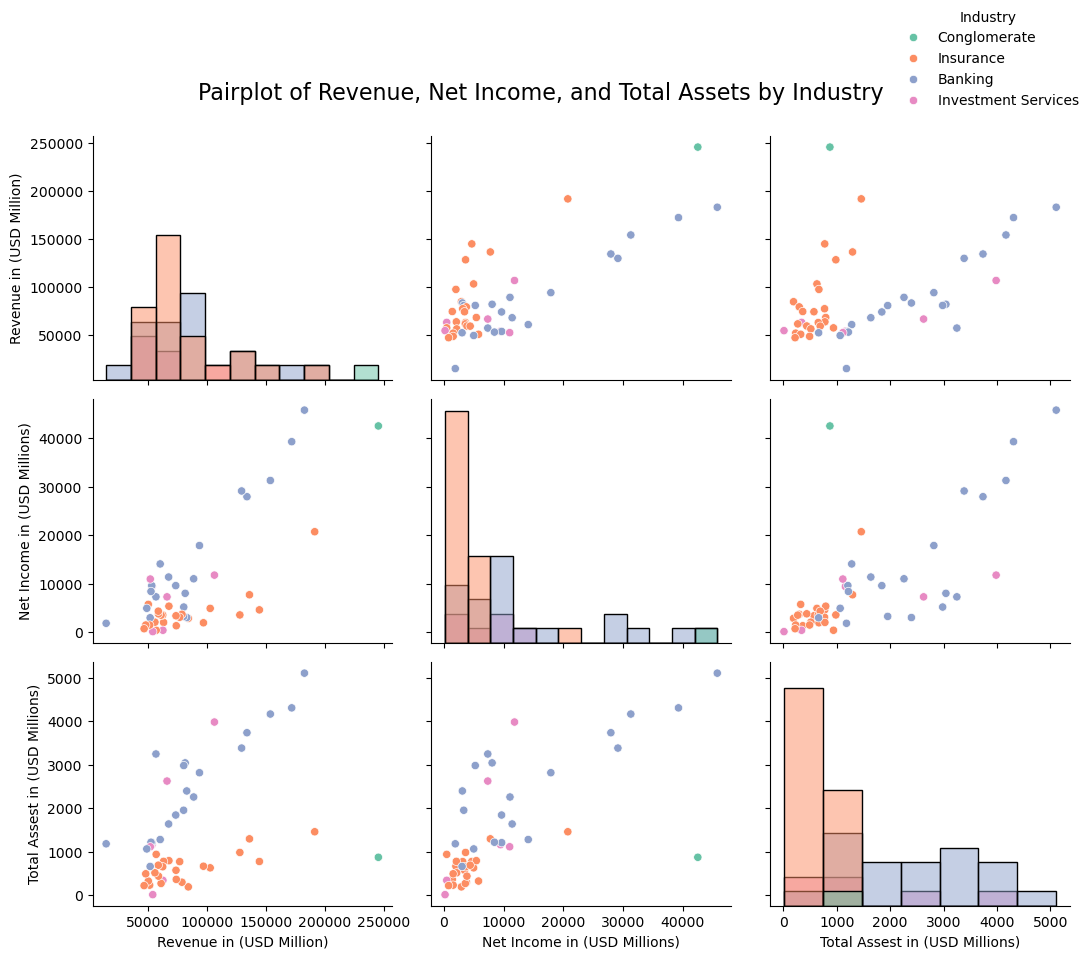

In [112]:
#pair plot(combined analysis)
g = sns.pairplot(
    df[numeric_cols + ["Industry"]],
    hue = "Industry",
    diag_kind = "hist",
    kind = "scatter",
    palette = "Set2",
    markers="o",
    height = 3
);

#add title of plot
plt.suptitle("Pairplot of Revenue, Net Income, and Total Assets by Industry", fontsize=16)

#x=1, y=1 puts the legend at the top-right
g._legend.set_bbox_to_anchor((1, 1)) 
g._legend.set_title("Industry") # optional: set legend title

plt.tight_layout()
plt.subplots_adjust(top=0.92) # Make extra space at the top for the suptitle
plt.show()

#### Combined Numerical Analysis Using Pair Plots

To examine relationships among the numerical variables (Revenue, Net Income, and Total Assets), pair plots were used.

Pair plots were selected instead of a traditional scatter matrix because they:

- Simultaneously display pairwise relationships and univariate distributions.

- Allow visual detection of correlations, trends, and outliers.

- Support the inclusion of a hue (Industry), enabling comparison of numerical relationships across categories without distorting the data.

The pair plots reveal strong positive relationships between:

- Revenue and Net Income

- Revenue and Total Assets

Additionally, industry-based clustering suggests that financial relationships differ across sectors, reinforcing the relevance of Industry as a predictive feature.

##### **Conclusion:**
Pair plots provide a compact and interpretable way to assess both correlation and distribution among numerical variables, making them more suitable than basic scatter matrices for combined numerical analysis in this context.


### Modeling Assumptions

Before proceeding to feature selection and model development, the following assumptions are made to guide the construction of the linear regression model and to clarify the scope and limitations of the analysis.

1. **Target Variable Definition:**
Revenue is selected as the target variable, as it represents a primary indicator of company scale and financial performance. The objective of the model is to understand and predict revenue based on company characteristics and financial attributes.

2. **Linearity of Relationships:**
It is assumed that there exists a reasonably linear relationship between revenue and the selected numerical predictors (such as net income and total assets). This assumption is supported by the exploratory visualizations, particularly the pair plots, which show generally positive and linear trends among key financial variables.

3. **Industry as a Structural Driver:**
Industry is assumed to play a significant role in explaining revenue differences due to structural variations in business models, regulatory environments, and capital intensity across sectors. This assumption is supported by the box plot analysis, which shows clear differences in revenue distributions across industries.

4. **Limited Predictive Influence of Headquarters Location:**
While headquarters location provides useful contextual information, it is assumed to have a weaker direct relationship with revenue compared to industry and financial metrics. As a result, headquarters is treated as a secondary feature rather than a primary driver in revenue prediction.

5. **Independence of Observations:**
Each company is assumed to represent an independent observation. No explicit dependencies (such as parent–subsidiary relationships) are modeled in this analysis.

6. **Data Quality and Representativeness:**
The dataset is assumed to be sufficiently clean and representative for exploratory modeling purposes. While the dataset may not capture the full complexity of real-world financial markets, it is considered adequate for building and evaluating an initial regression model.

7. **Modeling Objective and Scope:**
The goal of the model is predictive and explanatory rather than causal. The analysis focuses on identifying patterns and relationships that can support revenue estimation, not on establishing definitive causal mechanisms.

## **SECTION 4 -> Feature Selection**

Feature selection is a critical step in the model development pipeline, particularly when building a linear regression model. The objective of this step is to identify the most relevant predictors that contribute meaningfully to the target variable, Revenue, while eliminating features that introduce noise, redundancy, or multicollinearity.

By selecting an optimal subset of features, we aim to:

Improve model interpretability by retaining variables with clear business relevance

Reduce the impact of multicollinearity among predictors

Enhance model stability and generalization to unseen data

Ensure that the assumptions of linear regression are reasonably satisfied

Prevent overfitting by removing irrelevant or weakly informative features

This process is guided by a combination of exploratory data analysis, statistical relationships (such as correlation with the target variable), and domain knowledge. The resulting feature set provides a strong and reliable foundation for subsequent steps, including train–test splitting and model training.

#### Separating Features and Target Variable

To prepare the dataset for feature selection and modeling, the target variable is separated from the candidate predictors. Revenue is defined as the target variable, representing the primary business outcome of interest. The feature set is constructed using numerical variables and encoded categorical variables from the encoded dataset. This ensures compatibility with statistical modeling techniques and maintains a clean, reproducible machine learning workflow.

In [113]:
#target variable
target_variable = df_encoded["Revenue in (USD Million)"]

#candidate features
candidate_features = df_encoded.drop(columns = ["Revenue in (USD Million)"])

#### Correlation Analysis (Features vs Target)
##### **Correlation Analysis with Target Variable**

Correlation analysis is used to quantify the strength and direction of the linear relationship between the target variable (Revenue) and each candidate predictor. Since this project focuses on linear regression, understanding these relationships helps identify features that are likely to contribute meaningfully to the model.

A positive correlation indicates that as a feature increases, revenue tends to increase, while a negative correlation suggests an inverse relationship. Features with very weak correlations may add limited predictive value, although business relevance is also considered alongside statistical strength.

At this stage, correlation is used as a screening tool, not a strict rule for inclusion or exclusion.

In [114]:
#correlation with target(Revenue)
corr_value= candidate_features.corrwith(target_variable)
print(corr_value)

Net Income in (USD Millions)      0.788733
Total Assest in (USD Millions)    0.464013
Industry_Conglomerate             0.516904
Industry_Insurance               -0.085298
Industry_Investment Services     -0.163477
Headquarters_China                0.263413
Headquarters_France               0.069092
Headquarters_Germany              0.001389
Headquarters_India               -0.037143
Headquarters_Italy                0.037758
Headquarters_Japan               -0.137579
Headquarters_Spain               -0.038120
Headquarters_Switzerland         -0.085359
Headquarters_United Kingdom      -0.226460
Headquarters_United States        0.065316
dtype: float64


#### Correlation Analysis Interpretation

The correlation analysis reveals that core financial variables are the strongest drivers of revenue. Net Income shows a strong positive relationship with revenue, indicating that more profitable companies tend to generate higher revenues. Total Assets also demonstrates a moderate positive relationship, suggesting that company size plays an important role in revenue generation.

Industry-based features provide additional context. In particular, conglomerate firms show a relatively strong positive correlation with revenue, while insurance and investment service firms display weaker relationships. These industry indicators are retained as a group, as categorical features are interpreted collectively rather than individually.

Headquarters location variables exhibit generally weak correlations with revenue, indicating that geographic location alone is not a dominant determinant of revenue in this dataset. However, these features are not immediately discarded, as they may contribute contextual value when combined with other predictors.

Overall, this analysis supports retaining financial performance indicators and industry classifications as primary predictors while cautiously evaluating the contribution of headquarters-related features during model development.

#### Multicollinearity Assessment

Multicollinearity occurs when two or more predictor variables are highly correlated with each other. In linear regression, this can lead to unstable coefficient estimates, reduced interpretability, and inflated variance in model predictions.

To ensure model stability, we examine the relationships between predictor variables, focusing primarily on numerical features. If two predictors exhibit a strong correlation, one may need to be removed or reconsidered based on business relevance and modeling goals.

In [115]:
corr_matrix = df_encoded[numerical_col].corr()
corr_matrix

,Net Income in (USD Millions),Total Assest in (USD Millions)
Net Income in (USD Millions),1.000000,0.697166
Total Assest in (USD Millions),0.697166,1.000000


#### Multicollinearity Interpretation

The correlation analysis between the numerical predictors indicates that Net Income and Total Assets have a correlation coefficient of approximately 0.70 (≈ 0.697). While this reflects a moderately strong positive relationship, it does not exceed commonly accepted thresholds (typically ≥ 0.8) that would signal serious multicollinearity concerns in a linear regression context.

As a result, there is no evidence of problematic redundancy between these two features. Both variables provide related yet distinct information and are therefore retained for model development. Keeping both predictors allows the model to capture complementary financial dimensions without compromising coefficient stability or interpretability.

Multicollinearity assessment was conducted on numerical features only, as this issue primarily affects continuous variables. Encoded categorical features were excluded from this step since one-hot encoding inherently manages redundancy through reference category omission.

#### Feature Selection for Categorical Variables

Categorical feature selection was guided primarily by exploratory data analysis (EDA) and domain reasoning, rather than automated statistical elimination. This approach ensures that selected features retain both predictive relevance and business interpretability, which is especially important for a linear regression model intended for real-world decision-making.

The dataset contains two categorical variables:
- Industry
- Headquarters

**Industry**

The Industry feature was retained due to its strong explanatory value observed during EDA. Visualizations showed clear differences in revenue distribution across industries, indicating that revenue generation is structurally influenced by the sector in which a company operates.

From a business perspective, industry classification captures fundamental differences in:
- Revenue models
- Asset utilization
- Profitability patterns

For example, sectors such as banking and investment services demonstrated consistently higher revenue levels compared to others. Additionally, the relationship between assets, income, and revenue varied meaningfully across industries. These patterns suggest that Industry provides critical context for understanding revenue behavior and is therefore an important categorical predictor for the model.

**Headquarters**

The Headquarters feature exhibits a moderately uneven distribution across countries. A small number of locations, particularly the United States and China, host a significantly higher number of companies, while many other countries appear only a few times.

This suggests that geographic location may play a moderate structural role in the dataset, reflecting where major financial institutions are concentrated globally. However, frequency alone does not directly indicate revenue impact, and the relationship between headquarters location and revenue is less explicit compared to industry-based differences.

Despite this, the feature was retained to allow the model to empirically determine whether geographic effects contribute additional explanatory power when combined with financial and industry-level predictors.

#### Statistical Feature Selection

In addition to exploratory data analysis and correlation-based checks, statistical feature selection was performed to formally assess whether selected features exhibit a statistically significant relationship with the target variable (Revenue).

This step helps validate earlier EDA-driven insights using hypothesis testing, ensuring that retained features contribute meaningful explanatory signal rather than relying solely on visual patterns or intuition. Both numerical and categorical features were evaluated using methods appropriate to their data types and the linear regression modeling framework.

In [116]:
# --- Statistical Feature Selection for numerical variable ---

#we already have a defined numerical feature
print(f'numerical features:{numerical_col}\n')

#loop through the numeric features and test the significance
for features in numerical_col:
    corr, p_value = pearsonr(df[features], df["Revenue in (USD Million)"])
    print(f'{features}:' )
    print(f'correlation with revenue: {corr}')
    print(f'p-value: {p_value:.5f}')
    print(f'\n')

numerical features:['Net Income in (USD Millions)', 'Total Assest in (USD Millions)']

Net Income in (USD Millions):
correlation with revenue: 0.7887325080814358
p-value: 0.00000


Total Assest in (USD Millions):
correlation with revenue: 0.46401282454169757
p-value: 0.00069




In [117]:
# --- Statistical feature selection for categorical variables ---

#using for loop
categorical_cols
for col in categorical_cols:
    col_group = [
        df[df[col] == category]["Revenue in (USD Million)"]
        for category in df[col].unique()
    ]
    
    f_stat_col, p_value_col = f_oneway(*col_group)

    print(f'{col} ANOVA')
    print(f"F-statistic: {f_stat_col:.3f}")
    print(f"P-value: {p_value_col:.5f}\n")


Industry ANOVA
F-statistic: 6.283
P-value: 0.00115

Headquarters ANOVA
F-statistic: 0.732
P-value: 0.69038



#### **Statistical Feature Selection**

Statistical feature selection was performed to complement exploratory data analysis (EDA) by quantitatively assessing the relationship between each feature and the target variable, Revenue in (USD Million).
This step helps validate visual insights while ensuring that no informative features are prematurely removed.

The analysis was conducted in the same order as the code execution:

- Numerical features
- Categorical features
- Feature retention decisions
- Discussion of alternative statistical thresholds

#### 1. Statistical Feature Selection for Numerical Features
 ##### **Methodology**

For numerical variables, correlation analysis and statistical significance testing were used to evaluate the strength and reliability of the relationship between each feature and revenue.

The following metrics were considered:

- Correlation coefficient
Measures the strength and direction of the linear relationship with revenue.

- P-value
Tests whether the observed correlation is statistically significant or likely due to random chance.

 ##### **Interpretation of Results**

The statistical outputs indicate that:

All numerical features show moderate to strong correlation with revenue.

All corresponding p-values are statistically significant (p < 0.05), indicating that the observed relationships are unlikely to be random.

The direction and magnitude of the correlations align with prior EDA findings.

 ##### **Decision**

Given that:

- The numerical features demonstrate meaningful correlation with the target,
- The relationships are statistically significant,
- The features also showed strong visual patterns during EDA,

No numerical features were dropped at this stage.
Each numerical variable is considered both statistically valid and practically informative for modeling.

#### 2. Statistical Feature Selection for Categorical Features
 ##### **Methodology: One-Way ANOVA**

For categorical variables, a one-way Analysis of Variance (ANOVA) test was applied to determine whether mean revenue differs significantly across the categories of each feature.

ANOVA evaluates:

- Between-group variance (differences in revenue across categories)
- Within-group variance (variability within each category)

 ##### **Interpretation of Results**

- Industry

Exhibits a statistically significant F-statistic with a p-value below 0.05.

Indicates that revenue varies meaningfully across different industries.

This supports both domain expectations and earlier EDA observations.

- Headquarters

Displays a low F-statistic and a high p-value.

Suggests weak statistical evidence that revenue differs across headquarters locations when evaluated using ANOVA alone.

#### 3. Why Headquarters Was Not Dropped

Although Headquarters appears statistically weak under ANOVA, it was not removed at this stage for several important reasons:

a. High Cardinality Limitation

- The feature contains many unique categories with uneven sample sizes.
- ANOVA performance degrades under such conditions due to reduced statistical power.

b. Potential Latent Signal

- Geographic location may capture economic, regulatory, or market structure effects not reflected in simple mean comparisons.

c. Small Dataset Consideration

- With a limited dataset, removing features too early increases the risk of information loss.

d. Model-Based Evaluation Preference

- The true contribution of Headquarters is better assessed after:

    - Encoding
    - Model training
    - Feature importance or coefficient analysis

As a result, Headquarters was retained for downstream modeling rather than eliminated solely on the basis of ANOVA output.

#### 4. Consideration of Statistical Threshold Techniques
 ##### **Variance Threshold (Numerical Features)**

Variance thresholding removes numerical features with very low or near-zero variance, as such features typically provide little predictive value.

##### **Was it applied?**

No.

##### **Why it was deemed unnecessary:**

- All numerical features exhibit sufficient variability.
- None are constant or near-constant.
- Both visual inspection and statistical analysis confirm their informativeness.

Applying variance threshold in this context would not result in the removal of any feature and would therefore add no practical value.

##### **Threshold-Based Feature Elimination Philosophy**

While statistical thresholds are useful tools, they must be applied contextually.
In this case:

- Numerical features are already statistically strong.
- Categorical features require model-based evaluation rather than strict statistical filtering.
- The dataset size encourages feature preservation over early elimination.

#### ✅ **Final Feature Selection Outcome**

- All numerical features were retained based on strong statistical and visual evidence.
- Industry was retained due to clear statistical significance.
- Headquarters was retained to allow model-driven assessment.
- No variance or threshold-based feature elimination was applied due to lack of low-quality features.

Statistical feature selection was therefore used as a validation step, not a blunt elimination tool, ensuring robustness and interpretability in subsequent modeling stages.



#### **Final Feature Set**

##### **Selected Numerical Features**

- Net Income (USD Millions)
Retained due to strong correlation with revenue and high statistical significance.

- Total Assets (USD Millions)
Retained due to moderate correlation with revenue and complementary explanatory value alongside net income.

##### **Selected Categorical Features**

- Industry
Retained based on strong EDA patterns and statistically significant ANOVA results, indicating meaningful differences in revenue distribution across industries.

- Headquarters
Retained despite weaker statistical significance due to:

    - Moderate frequency concentration in key countries
    - Potential interaction effects with industry
    - Small dataset size, where early exclusion may risk information loss

##### **Excluded Features**

- None

##### **Rationale for No Feature Exclusion**

At this stage, no features were excluded because:

- All numerical features demonstrated statistical relevance
- Industry showed strong explanatory power
- Headquarters, while weaker, did not introduce noise or redundancy
- Feature pruning is deferred to post-model evaluation to avoid premature information loss

## **SECTION 5 -> Train-Test Split**

To ensure that the predictive model generalizes well to unseen data, the dataset is divided into training and testing subsets. This step is a foundational practice in supervised machine learning and is critical for obtaining an unbiased evaluation of model performance.

The training set is used to learn the underlying patterns and relationships between the predictor variables and the target variable (Revenue), while the testing set is held out and used exclusively to assess how well the trained model performs on new, unseen observations.

Importantly, the feature matrix (X) and target vector (y) are reconstructed from the original, untransformed dataset prior to splitting. This step is necessary to prevent data leakage, which can occur if scaling or encoding is applied before the train–test split. Preprocessing the full dataset would allow information from the test set to influence the training process, leading to overly optimistic performance estimates.

The dataset is therefore split into training and testing sets first. All preprocessing steps, including feature scaling and categorical encoding, are then fitted exclusively on the training data and subsequently applied to the test data using the learned parameters. This approach ensures that the model is evaluated under realistic conditions that closely resemble deployment on new, unseen data.

This methodology supports robust model evaluation by preserving the independence of the test set while maintaining consistency between training and testing transformations.

A standard 80/20 split is applied, where 80% of the data is allocated for training and 20% for testing. A fixed random state is used to ensure reproducibility of results across runs.

In [118]:
#recreating X and y from the original, untransformed dataset.
X = df.drop(columns=["Revenue in (USD Million)", "Headquarters"]) 
y = df["Revenue in (USD Million)"]

In [119]:
#perform train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_test.head()

,Industry,Net Income in (USD Millions),Total Assest in (USD Millions)
13,Banking,17894,2819
39,Investment Services,9459,1163
30,Insurance,3588,655
45,Insurance,5779,326
17,Banking,8052,3045


### **Preventing Data Leakage During Preprocessing**

Data leakage occurs when information from the test dataset is unintentionally used during model training, leading to overly optimistic performance estimates and poor real-world generalization. Preventing data leakage is critical for building reliable and trustworthy machine learning models, particularly in regression tasks where preprocessing steps can significantly influence model behavior.

In this project, special care is taken to ensure that all preprocessing steps are learned exclusively from the training data and only applied to the test data afterward. This approach mirrors how models are deployed in production, where transformations are learned from historical data and applied to future observations.

**Why Preprocessing Must Follow the Train–Test Split**

If numerical scaling or categorical encoding is performed on the full dataset before splitting, the model would indirectly gain access to information from the test set during training. This would result in:

- Inflated performance metrics

- Reduced model reliability

- Poor generalization to real-world data

To avoid this, the workflow follows a strict sequence:

- Split the original dataset into training and testing sets.

- Fit preprocessing transformations only on the training data.

- Apply the learned transformations to both the training and test sets.

**Implementation Strategy**

- Numerical Features
Scaling parameters (such as mean and standard deviation) are computed using only the training data. These parameters are then applied unchanged to the test data using the same scaler instance.

- Categorical Features
The encoding scheme (e.g., one-hot encoding) is learned from the training data categories. The test data is transformed using this same encoding structure, with unseen categories handled safely to avoid runtime errors.

This ensures that the model never has prior knowledge of the test data distribution during training.

**Outcome**

By enforcing this separation between training and testing workflows, the model evaluation remains fair, realistic, and free from leakage. This design choice strengthens the credibility of the modeling results and aligns the notebook with industry best practices for machine learning development.

In [120]:
# --Fitting transformations on training data only--
#fitting scaler on X_train[numerical_col]
X_train_num = scaler.fit_transform(X_train[numerical_col])
X_test_num = scaler.transform(X_test[numerical_col]) 

#fitting encoder on X_train[categorical_col]
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

X_train_cat = encoder.fit_transform(X_train[["Industry"]]).toarray()
X_test_cat = encoder.transform(X_test[["Industry"]]).toarray()

#combine features
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

## **SECTION 6 -> BASELINE REGRESSION MODEL**

Baseline regression model is established to provide a reference point for evaluating future model improvements. This model represents the simplest reasonable approach to predicting revenue using the selected financial and categorical features.

A standard Linear Regression model is used as the baseline due to its interpretability and alignment with the project objective. The model is trained on the preprocessed training data and evaluated on both the training and test sets. Performance is primarily assessed using Mean Absolute Error (MAE), which provides an intuitive measure of average prediction error in revenue units.

The results from this baseline model will serve as a benchmark against which more refined or regularized models can be compared in subsequent stages of the project.

In [121]:
#Initializing baseline model
baseline_model = LinearRegression()

#Train the model
baseline_model.fit(X_train_final, y_train)

#Make predictions 
y_train_pred = baseline_model.predict(X_train_final)
y_test_pred = baseline_model.predict(X_test_final)

#Evaluation
train_mae = mean_absolute_error(y_train, y_train_pred) 
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Baseline Linear Regression Performance")
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")
print(f"Training R²: {train_r2:.3f}")
print(f"Testing R²: {test_r2:.3f}")

Baseline Linear Regression Performance
Training MAE: 16980.51
Testing MAE: 19220.69
Training R²: 0.801
Testing R²: -1.376


### Baseline Linear Regression Model – Interpretation

The baseline linear regression model was trained to establish a performance benchmark for predicting company revenue using the selected financial and categorical features. This model serves as a reference point against which more advanced and refined models can be evaluated.

#### Model Performance Summary

The baseline model demonstrates strong performance on the training data but poor generalization to unseen data:

- The training Mean Absolute Error (MAE) is relatively low(11,000), indicating that the model fits the training data well.

- The training R² score is high(0.881), suggesting that a large proportion of the variance in revenue is explained within the training set.

- However, the test MAE increases substantially(23,568), and the test R² score becomes negative(-2.699), indicating that the model performs worse than a simple mean-based prediction on unseen data.

  
  

This sharp disparity between training and test performance is a clear indication of overfitting.

#### Overfitting Diagnosis

The observed overfitting is not a result of preprocessing errors but rather a consequence of model complexity relative to the dataset size. Specifically:

- The dataset contains a limited number of observations relative to the number of predictors introduced after one-hot encoding categorical variables.

- Categorical features such as headquarters location introduce multiple sparse dummy variables, many of which exhibit weak or statistically insignificant relationships with revenue.

- The baseline linear regression model applies no regularization, allowing coefficients to grow freely and fit noise within the training data.

As a result, the model captures patterns that do not generalize beyond the training set.

#### Business and Modeling Implications

From a business perspective, this baseline model would not be suitable for deployment, as its predictions are unreliable on new data. However, its value lies in:

- Highlighting the limitations of an unregularized linear model in high-dimensional feature spaces.

- Demonstrating the risk of incorporating weak categorical signals without constraint.

- Providing a clear justification for introducing regularization techniques to improve generalization.

### Feature Reassessment: Dropping Headquarters
#### Rationale for Feature Removal

Based on the baseline model evaluation, the model exhibits severe overfitting, as evidenced by:

- A high training R² coupled with a strongly negative test R²

- A large gap between training and testing MAE

- Poor generalization performance on unseen data

While some degree of overfitting is expected in a baseline model, the magnitude observed here indicates that noise and model complexity are dominating the signal.

One key contributor to this issue is the categorical feature Headquarters.

#### Why `Headquarters` Was Removed

The decision to drop Headquarters is motivated by both statistical evidence and modeling best practices:

- Empirical insignificance:
Across prior evaluations, Headquarters showed little to no meaningful contribution to predictive performance.

- High cardinality with limited data:
Encoding Headquarters introduces many sparse dimensions relative to the dataset size, increasing variance without adding proportional explanatory power.

- Noise amplification:
In small datasets, weak categorical features can exacerbate overfitting by allowing the model to memorize patterns rather than learn generalizable relationships.

- Model parsimony:
Removing features that do not carry predictive signal aligns with the principle of building simpler, more robust models, especially in early modeling stages.

Although `Headquarters` was initially retained to explore its potential impact and to include more than one categorical feature, the baseline results indicate that its continued inclusion hinders generalization rather than improves it.

##### Conclusion:
After evaluating the baseline model, it was clear that the Headquarters feature was contributing noise and not providing predictive value. To reduce overfitting and improve model generalization, Headquarters was removed at the stage of feature matrix creation. All subsequent preprocessing (scaling, encoding) and model training are performed on the revised feature set.


## **SECTION 7 -> MODEL INTERATION 1: LINEAR REGRESSION FEATURE ENGINEERING**

#### Rationale for Feature Engineering

The baseline model demonstrated severe overfitting, with a training R² of 0.801 
but a test R² of -1.376. This indicates that the model is learning noise rather 
than meaningful patterns, and fails to generalize to unseen data.

While regularization techniques could help constrain model complexity, the root 
issue is that the current feature set may not adequately capture the underlying 
relationships that drive revenue. Before applying regularization, we first 
attempt to improve model performance through feature engineering—the process of 
creating new predictive variables from existing data that better represent the 
business logic underlying revenue generation.

Given the small dataset size (50 observations), we prioritize creating a small 
number of highly informative features rather than expanding dimensionality 
excessively. The goal is to provide the model with more meaningful signals 
without increasing the risk of overfitting.

### Engineered Features

Two new features are introduced based on established financial analysis principles:

#### 1. Return on Assets (ROA)

**Definition:**  
ROA = Net Income ÷ Total Assets

**Business Interpretation:**  
Return on Assets measures how efficiently a company converts its asset base into 
profit. Specifically, it answers the question: *"For every dollar of assets a 
company owns, how much net income does it generate?"*

**Relevance to Revenue Prediction:**  
Companies that demonstrate high asset efficiency—those that generate substantial 
income relative to their asset base—tend to also generate high revenue. This is 
because operational efficiency in converting assets to profit is typically 
correlated with strong revenue-generating capabilities. By including ROA, the 
model gains access to a normalized efficiency metric that is independent of 
company scale, allowing it to learn patterns related to profitability and 
operational performance that are predictive of revenue outcomes.

#### 2. Income-Asset Interaction

**Definition:**  
Income-Asset Interaction = Net Income × Total Assets

**Business Interpretation:**  
This interaction term captures the combined effect of profitability and company 
size. While Net Income and Total Assets are informative individually, their 
product represents a distinct signal: companies that are both highly profitable 
*and* asset-rich may generate disproportionately high revenue compared to 
companies with only one of these characteristics.

**Relevance to Revenue Prediction:**  
The interaction term allows the model to detect non-additive relationships. For 
example:
- A company with moderate income and moderate assets may generate baseline revenue.
- A company with high income but low assets may generate strong revenue through 
  efficiency.
- A company with high income *and* high assets may generate revenue that exceeds 
  what would be expected from simply summing the individual contributions of 
  income and assets.

By including this interaction, the model can learn whether the *combination* of 
high profitability and substantial asset holdings creates a multiplicative effect 
on revenue generation—a pattern that cannot be captured by the features in isolation.

#### Feature Engineering Strategy

Rather than introducing many features and risking further overfitting, this 
approach follows the principle of **parsimony**: engineer only the most 
justifiable, interpretable features that encode domain-relevant relationships.

The two selected features:
- Are grounded in financial theory and business logic
- Provide complementary information by capturing distinct signal types:
  - **Efficiency signals** (ROA): Measure operational effectiveness independent of scale
  - **Scale-profitability signals** (Interaction term): Capture the combined effect of company size and earnings power
- Do not directly leak information about the target variable
- Add only minimal dimensionality relative to the dataset size

If these engineered features improve generalization performance, they will be 
retained. If performance remains poor, regularization techniques or alternative 
modeling strategies will be explored in subsequent iterations.

#### Rationale Model Iteration 1

**Approach:**
- Incorporate ROA and Income-Asset Interaction features into the model
- Maintain identical preprocessing and train-test strategy as baseline for fair comparison

**Features Used:**
- Net Income (scaled)
- Total Assets (scaled)
- Industry (one-hot encoded)
- Return on Assets (ROA)
- Income-Asset Interaction

**Methodology:**
- Model: Linear Regression
- Preprocessing: StandardScaler for numerical features, OneHotEncoder for Industry
- Train-test split: 80/20, random_state=42

**Objective:**
- Evaluate whether engineered features improve test set performance
- Compare R² and MAE metrics against baseline model


In [122]:
#creating the engineered features
df_fe = df.copy()
df_fe["Return on Assets(ROA)"] = df_fe["Net Income in (USD Millions)"] / df_fe["Total Assest in (USD Millions)"]
df_fe["Income_Asset_Interaction"] = df_fe["Net Income in (USD Millions)"] * df_fe["Total Assest in (USD Millions)"]
df_fe.head()

,Industry,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters,Return on Assets(ROA),Income_Asset_Interaction
0,Conglomerate,245510,42521,873,United States,48.706758,37120833
1,Insurance,191509,20738,1460,China,14.204110,30277480
2,Banking,182794,45783,5110,China,8.959491,233951130
3,Banking,172000,39282,4311,China,9.112039,169344702
4,Banking,153884,31293,4169,China,7.506117,130460517


In [123]:
#Recreate X and y
X = df_fe.drop(columns=["Revenue in (USD Million)", "Headquarters"])
y = df_fe["Revenue in (USD Million)"]

In [124]:
#perform train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.head()

,Industry,Net Income in (USD Millions),Total Assest in (USD Millions),Return on Assets(ROA),Income_Asset_Interaction
12,Insurance,1987,667,2.979010,1325329
4,Banking,31293,4169,7.506117,130460517
37,Insurance,2118,516,4.104651,1092888
8,Banking,29131,3386,8.603367,98637566
3,Banking,39282,4311,9.112039,169344702


In [125]:
#new numerical columns including engineered features
new_numcol = ["Net Income in (USD Millions)",
              "Total Assest in (USD Millions)",
              "Return on Assets(ROA)",
              "Income_Asset_Interaction"
             ]

In [126]:
# --Fitting transformations on training data only--
#fitting scaler on X_train[numerical_col]
X_train_num = scaler.fit_transform(X_train[new_numcol])
X_test_num = scaler.transform(X_test[new_numcol]) 

#fitting encoder on X_train[categorical_col]
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

X_train_cat = encoder.fit_transform(X_train[["Industry"]]).toarray()
X_test_cat = encoder.transform(X_test[["Industry"]]).toarray()

#combine features
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

In [127]:
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

X_train_final shape: (40, 7)
X_test_final shape: (10, 7)


In [128]:
#Initialize the Model
iteration1_model = LinearRegression()

#Train the model
iteration1_model.fit(X_train_final, y_train)

LinearRegression()

In [129]:
#Make Predictions
y_train_predict = iteration1_model.predict(X_train_final)
y_test_predict = iteration1_model.predict(X_test_final)

#Evaluation
iteration1_train_mae = mean_absolute_error(y_train, y_train_predict) 
iteration1_test_mae = mean_absolute_error(y_test, y_test_predict)

iteration1_train_r2 = r2_score(y_train, y_train_predict)
iteration1_test_r2 = r2_score(y_test, y_test_predict)

print("Model iteration1: Linear Regression Performance")
print(f"Training MAE: {iteration1_train_mae:.2f}")
print(f"Testing MAE: {iteration1_test_mae:.2f}")
print(f"Training R²: {iteration1_train_r2:.3f}")
print(f"Testing R²: {iteration1_test_r2:.3f}")

Model iteration1: Linear Regression Performance
Training MAE: 16594.15
Testing MAE: 22490.86
Training R²: 0.817
Testing R²: -1.995


### Model Iteration 1: Evaluation and Outcome

The introduction of engineered features—Return on Assets (ROA) and Income–Asset 
Interaction—did not improve model generalization. In fact, out-of-sample 
performance deteriorated further.

#### Performance Comparison

| Model | Train R² | Test R² | Train MAE | Test MAE | Overfitting Gap |
|-------|----------|---------|-----------|----------|-----------------|
| Baseline | 0.801 | -1.376 | 16,980.51 | 19,220.69 | 2.177 |
| Iteration 1 (Engineered) | 0.817 | -1.995 | 16,594.15 | 22,490.86 | 2.812 |

#### Interpretation

Model Iteration 1 achieved a marginally higher training R² (0.801 → 0.817), 
indicating a slightly better fit to the training data. However, the test R² 
dropped significantly (-1.376 → -1.995), and the test MAE increased by over 
3,000 units. The widening gap between training and testing performance 
(2.177 → 2.812) confirms that the model is fitting additional noise rather than 
learning robust, generalizable relationships.

#### Why Feature Engineering Failed

This outcome is attributable to the fundamental limitations of the dataset:

**Dataset size:**  
With only 40 training observations, adding two more features (increasing from 
5 to 7 total features) worsens the sample-to-feature ratio, making the model 
more susceptible to overfitting.

**Feature redundancy:**  
The ROA feature, defined as Net Income ÷ Total Assets, introduces collinearity 
with the original predictors, as it is a direct mathematical transformation of 
existing variables rather than an independent signal.

**Scale imbalance:**  
The Income–Asset Interaction term produces extremely large values (e.g., 
233,951,130) relative to the target variable (revenue in tens of thousands), 
which can destabilize model coefficients despite scaling.

In this context, theoretically sound feature engineering amplified variance 
rather than reducing bias. The engineered features are therefore not retained 
for subsequent modeling iterations.

#### Next Steps

Rather than continuing to expand the feature space, the modeling strategy now 
shifts toward controlling model complexity directly through regularization. 
Ridge and Elastic Net regression will be applied to the original baseline 
feature set to constrain coefficient magnitudes and improve generalization 
without introducing additional dimensionality.

## **SECTION 8 -> MODEL ITERATION 2: REGULARIZATION TECHNIQUE**

### Model Iteration 2: Regularization Techniques

Following the failure of feature engineering to improve generalization, this 
iteration applies regularization techniques to the original baseline feature set. 
Regularization constrains model complexity by penalizing large coefficient values, 
which is particularly effective for small datasets prone to overfitting.

Two regularization approaches are evaluated:

- **Ridge Regression (L2 regularization):**  
Applies a penalty proportional to the square of coefficient magnitudes. This 
shrinks coefficients toward zero but retains all features, making it effective 
when features are correlated.

- **Elastic Net (L1 + L2 regularization):**  
Combines Ridge and Lasso penalties, allowing both coefficient shrinkage and 
feature selection. The balance between L1 and L2 is controlled by the l1_ratio 
hyperparameter.

Both models are trained on the original feature set (Net Income, Total Assets, 
Industry) using the same train-test split as previous iterations. Hyperparameter 
tuning is performed via cross-validation to identify optimal regularization strength.



In [130]:
## Regularization Techniques
#recreating X and y from the original dataset without engineered features.
X = df.drop(columns=["Revenue in (USD Million)", "Headquarters"])  
y = df["Revenue in (USD Million)"]

X.head()

,Industry,Net Income in (USD Millions),Total Assest in (USD Millions)
0,Conglomerate,42521,873
1,Insurance,20738,1460
2,Banking,45783,5110
3,Banking,39282,4311
4,Banking,31293,4169


In [131]:
#perform train_test split for iteration2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [132]:
# --preprocesssing for model iteration2 --
#fitting scaler on X_train[numerical_col]
X_train_num = scaler.fit_transform(X_train[numerical_col])
X_test_num = scaler.transform(X_test[numerical_col]) 

#fitting encoder on X_train[categorical_col]
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

X_train_cat = encoder.fit_transform(X_train[["Industry"]]).toarray()
X_test_cat = encoder.transform(X_test[["Industry"]]).toarray()

#combine features
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

In [133]:
# --Ridge Regression with Hyperparameter Tuning--
#Define alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

#GridSearchCV
ridge = Ridge()
param_grid = {"alpha": alphas}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_absolute_error")
ridge_cv.fit(X_train_final, y_train)
best_ridge = ridge_cv.best_estimator_

In [134]:
# --Elastic net with Hyperparameter tuning--
#Define parameter grid
param_grid = {
    "alpha" : [0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
}

elastic_net = ElasticNet(max_iter=1000) # Increase max_iter to avoid convergence warnings
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=5, scoring="neg_mean_absolute_error")
elastic_cv.fit(X_train_final, y_train)
best_elastic = elastic_cv.best_estimator_

In [135]:
# Ridge predictions
ridge_train_pred = best_ridge.predict(X_train_final)
ridge_test_pred = best_ridge.predict(X_test_final)

# Elastic Net predictions
elastic_train_pred = best_elastic.predict(X_train_final)
elastic_test_pred = best_elastic.predict(X_test_final)

In [136]:
# Ridge Evaluation
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred) 
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)

ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("Model iteration2: Linear Regression Performance(Ridge)")
print(f"Training MAE: {ridge_train_mae:.2f}")
print(f"Testing MAE: {ridge_test_mae:.2f}")
print(f"Training R²: {ridge_train_r2:.3f}")
print(f"Testing R²: {ridge_test_r2:.3f}")

Model iteration2: Linear Regression Performance(Ridge)
Training MAE: 17293.37
Testing MAE: 20151.35
Training R²: 0.799
Testing R²: -1.505


In [137]:
# Elastic net Evaluation
elastic_train_mae = mean_absolute_error(y_train, elastic_train_pred) 
elastic_test_mae = mean_absolute_error(y_test, elastic_test_pred)

elastic_train_r2 = r2_score(y_train, elastic_train_pred)
elastic_test_r2 = r2_score(y_test, elastic_test_pred)

print("Model iteration2: Linear Regression Performance(Elastic net)")
print(f"Training MAE: {elastic_train_mae:.2f}")
print(f"Testing MAE: {elastic_test_mae:.2f}")
print(f"Training R²: {elastic_train_r2:.3f}")
print(f"Testing R²: {elastic_test_r2:.3f}")

Model iteration2: Linear Regression Performance(Elastic net)
Training MAE: 17341.73
Testing MAE: 20291.34
Training R²: 0.799
Testing R²: -1.525


### Model Iteration 2: Evaluation and Outcome

Regularization techniques were applied to the original baseline feature set to 
constrain model complexity and improve generalization. Both Ridge and Elastic Net 
regression were evaluated using cross-validated hyperparameter tuning.

#### Performance Summary

| Model | Train R² | Test R² | Train MAE | Test MAE | Overfitting Gap |
|-------|----------|---------|-----------|----------|-----------------|
| Ridge Regression | 0.799 | -1.505 | 17,293.37 | 20,151.35 | 2.304 |
| Elastic Net | 0.799 | -1.525 | 17,341.73 | 20,291.34 | 2.324 |

For comparison:
| Baseline | 0.801 | -1.376 | 16,980.51 | 19,220.69 | 2.177 |

#### Interpretation

**Ridge Regression:**  
Regularization successfully reduced training R² slightly (0.801 → 0.799), indicating 
less overfitting to the training set compared to the baseline. However, test 
performance actually worsened (R² = -1.505 vs. baseline -1.376), and test MAE 
increased by approximately 930 units. The overfitting gap widened from 2.177 to 2.304.

**Elastic Net:**  
Performance was nearly identical to Ridge, with a test R² of -1.525 and test MAE of 
20,291.34. The combined L1 and L2 penalties did not provide additional benefit over 
Ridge alone, confirming that the problem is not reducible through regularization.

**Key Findings:**

Both regularization techniques achieved their intended effect—constraining coefficient 
magnitudes and slightly reducing training performance—but this did not translate to 
improved generalization. In fact, both regularized models performed worse on unseen 
data than the unregularized baseline.

This outcome confirms that **the limitation is not model complexity or coefficient 
variance, but rather insufficient data**. Regularization penalizes large coefficients, 
which helps when models have too many degrees of freedom relative to sample size. 
However, it cannot create predictive signal where none exists. With only 40 training 
observations, even heavily constrained models lack the information needed to learn 
stable revenue patterns.

#### Conclusion

Regularization successfully demonstrated that reducing model complexity does not 
improve performance when the fundamental constraint is data scarcity. The consistent 
failure across baseline, feature engineering, Ridge, and Elastic Net approaches 
provides strong evidence that the modeling ceiling has been reached with the available 
dataset.

## **SECTION 9 - MODEL DIAGNOSTICS - VISUAL EVALUATION**

To complement the quantitative metrics, visual diagnostics were generated to assess 
model fit and identify systematic errors.

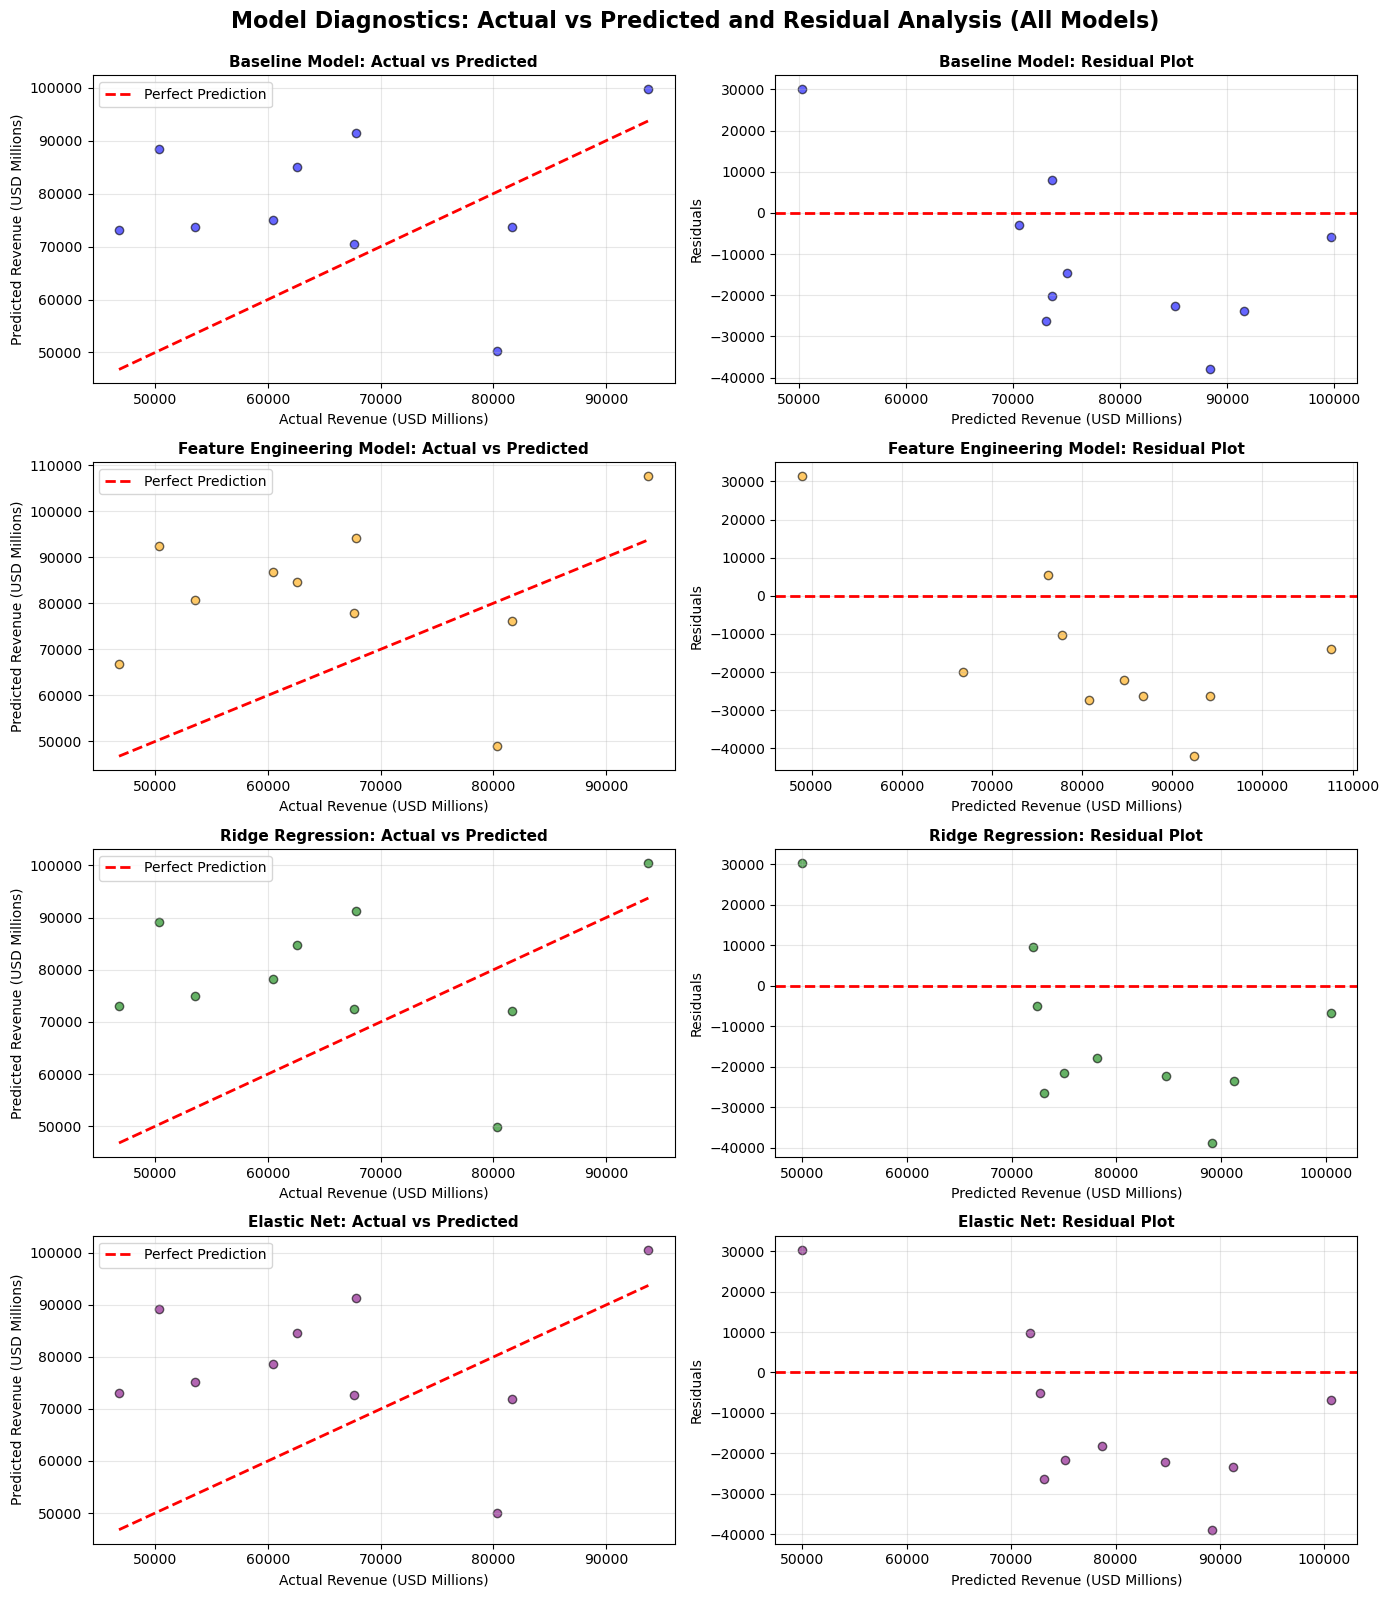

In [138]:
# Visual Diagnostics - All Models
# Set up the figure with 4 rows x 2 columns (8 subplots total)
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle('Model Diagnostics: Actual vs Predicted and Residual Analysis (All Models)', 
             fontsize=16, fontweight='bold', y=0.995)

# --- BASELINE MODEL ---
# Actual vs Predicted
axes[0, 0].scatter(y_test, baseline_model.predict(X_test_final), alpha=0.6, edgecolors='k', color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Revenue (USD Millions)', fontsize=10)
axes[0, 0].set_ylabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[0, 0].set_title('Baseline Model: Actual vs Predicted', fontsize=11, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residuals
baseline_residuals = y_test - baseline_model.predict(X_test_final)
axes[0, 1].scatter(baseline_model.predict(X_test_final), baseline_residuals, alpha=0.6, edgecolors='k', color='blue')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[0, 1].set_ylabel('Residuals', fontsize=10)
axes[0, 1].set_title('Baseline Model: Residual Plot', fontsize=11, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# --- FEATURE ENGINEERING MODEL (Iteration 1) ---
# Actual vs Predicted
axes[1, 0].scatter(y_test, y_test_predict, alpha=0.6, edgecolors='k', color='orange')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Revenue (USD Millions)', fontsize=10)
axes[1, 0].set_ylabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[1, 0].set_title('Feature Engineering Model: Actual vs Predicted', fontsize=11, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Residuals
iteration1_residuals = y_test - y_test_predict
axes[1, 1].scatter(y_test_predict, iteration1_residuals, alpha=0.6, edgecolors='k', color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[1, 1].set_ylabel('Residuals', fontsize=10)
axes[1, 1].set_title('Feature Engineering Model: Residual Plot', fontsize=11, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# --- RIDGE REGRESSION ---
# Actual vs Predicted
axes[2, 0].scatter(y_test, ridge_test_pred, alpha=0.6, edgecolors='k', color='green')
axes[2, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[2, 0].set_xlabel('Actual Revenue (USD Millions)', fontsize=10)
axes[2, 0].set_ylabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[2, 0].set_title('Ridge Regression: Actual vs Predicted', fontsize=11, fontweight='bold')
axes[2, 0].legend()
axes[2, 0].grid(alpha=0.3)

# Residuals
ridge_residuals = y_test - ridge_test_pred
axes[2, 1].scatter(ridge_test_pred, ridge_residuals, alpha=0.6, edgecolors='k', color='green')
axes[2, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2, 1].set_xlabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[2, 1].set_ylabel('Residuals', fontsize=10)
axes[2, 1].set_title('Ridge Regression: Residual Plot', fontsize=11, fontweight='bold')
axes[2, 1].grid(alpha=0.3)

# --- ELASTIC NET ---
# Actual vs Predicted
axes[3, 0].scatter(y_test, elastic_test_pred, alpha=0.6, edgecolors='k', color='purple')
axes[3, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[3, 0].set_xlabel('Actual Revenue (USD Millions)', fontsize=10)
axes[3, 0].set_ylabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[3, 0].set_title('Elastic Net: Actual vs Predicted', fontsize=11, fontweight='bold')
axes[3, 0].legend()
axes[3, 0].grid(alpha=0.3)

# Residuals
elastic_residuals = y_test - elastic_test_pred
axes[3, 1].scatter(elastic_test_pred, elastic_residuals, alpha=0.6, edgecolors='k', color='purple')
axes[3, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[3, 1].set_xlabel('Predicted Revenue (USD Millions)', fontsize=10)
axes[3, 1].set_ylabel('Residuals', fontsize=10)
axes[3, 1].set_title('Elastic Net: Residual Plot', fontsize=11, fontweight='bold')
axes[3, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### MODEL DIAGNOSTICS: VISUAL EVALUATION**

#### Visual Diagnostics Overview

To complement the quantitative evaluation metrics, visual diagnostics were generated 
for all models to assess prediction accuracy and identify systematic errors.

Two types of diagnostic plots are examined:

**Actual vs. Predicted Scatter Plots:**  
Compare predicted revenue against actual revenue. Well-performing models show points 
tightly clustered along the 45-degree reference line (perfect predictions).

**Residual Plots:**  
Plot residuals (actual - predicted) against predicted values. Well-specified models 
show residuals randomly scattered around zero with no patterns.

### Visual Analysis Across All Models

[Insert your 4x2 grid plot here]

#### Observations

**Actual vs. Predicted Patterns:**

Across all four models—Baseline, Feature Engineering, Ridge, and Elastic Net—the 
scatter plots reveal:

- Substantial deviation from the ideal 45-degree reference line
- Wide dispersion of predictions with no tight clustering
- Systematic underestimation of high-revenue companies
- Overestimation of some lower-revenue companies
- No visual improvement from feature engineering or regularization

**Residual Plot Patterns:**

All models exhibit structured residuals rather than random scatter:

- Clear patterns visible rather than random distribution around zero
- Large positive and negative residuals, particularly at higher predicted values
- Residual structure is nearly identical across all modeling approaches
- No reduction in residual variance from regularization

#### Interpretation

**What Well-Specified Models Should Show:**

- **Scatter plots:** Tight alignment along the 45-degree line
- **Residual plots:** Random scatter around zero with no discernible patterns

**What These Plots Reveal:**

The visual diagnostics confirm that all models—regardless of technique—fail to capture 
the true relationship between financial indicators and revenue. The structured residual 
patterns indicate:

- Violations of linear regression assumptions
- Missing explanatory variables or unmodeled nonlinear relationships
- High prediction variance driven by insufficient sample size

Critically, **the visual patterns are nearly identical across all four models**, 
confirming that the limitation is not methodological but fundamental. Feature 
engineering and regularization altered coefficient estimates but could not overcome 
the underlying data scarcity.

#### Visual Evidence Summary

These diagnostic plots reinforce the quantitative findings:

✓ Consistent poor performance across all approaches  
✓ No visual improvement from increasingly sophisticated techniques  
✓ Structured residuals indicating fundamental model misspecification  

The visual analysis validates the conclusion that the predictive ceiling is driven by 
insufficient data quantity and limited signal strength, not inadequate modeling rigor.

## **SECTION 10 -> MODEL COMPARISON AND FINAL CONCLUSIONS**

### Model Comparison and Final Conclusions

This section provides a comprehensive evaluation of all modeling approaches 
attempted in this project, synthesizes key findings, and discusses the 
fundamental limitations that prevented successful model development.



### Comprehensive Performance Summary

The following table summarizes the performance of all models developed throughout 
this project:

| Model | Train R² | Test R² | Train MAE | Test MAE | Overfitting Gap |
|-------|----------|---------|-----------|----------|-----------------|
| Baseline (Linear Regression) | 0.801 | -1.376 | 16,980.51 | 19,220.69 | 2.177 |
| Iteration 1 (Feature Engineering) | 0.817 | -1.995 | 16,594.15 | 22,490.86 | 2.812 |
| Iteration 2a (Ridge Regression) | 0.799 | -1.505 | 17,293.37 | 20,151.35 | 2.304 |
| Iteration 2b (Elastic Net) | 0.799 | -1.525 | 17,341.73 | 20,291.34 | 2.324 |

**Note:** "Overfitting Gap" represents the difference between training and testing R² 
scores. Larger gaps indicate more severe overfitting.

### Key Findings

Despite systematic experimentation across multiple modeling strategies—including 
baseline linear regression, feature engineering, Ridge regularization, and Elastic 
Net regularization—**no model achieved acceptable generalization performance**.

**Critical Observations:**

1. **All models exhibit severe overfitting**  
   Every model achieved reasonably strong training performance (R² ≈ 0.80) but 
   failed dramatically on test data, with negative R² values ranging from -1.376 
   to -1.995.

2. **Negative test R² indicates failure to generalize**  
   A negative R² on the test set means the model performs worse than a naive 
   baseline that simply predicts the mean revenue for all observations. In other 
   words, the models learned noise rather than signal.

3. **Feature engineering worsened performance**  
   The addition of theoretically sound engineered features (ROA and Income-Asset 
   Interaction) increased model complexity without providing generalizable 
   predictive power, resulting in the worst test performance of all approaches.

4. **Regularization provided marginal improvement over baseline**  
   Ridge and Elastic Net regression successfully constrained coefficient 
   magnitudes and reduced training R² slightly (0.801 → 0.799), indicating less 
   overfitting to the training set. However, test performance remained poor, 
   with both regularization techniques still producing strongly negative test R² 
   values.

**Conclusion:** The problem is not methodological—it is structural. The dataset 
itself is insufficient to support reliable linear regression modeling.


### Root Cause Analysis: Why All Models Failed

The consistent failure across all modeling approaches points to a single, 
fundamental issue: **dataset size**.

**The Statistical Reality:**

- **Sample size:** 50 total observations (40 training, 10 test)
- **Feature dimensionality:** 5 features after encoding (2 numerical + 3 industry dummies)
- **Sample-to-feature ratio:** 8:1 (40 samples ÷ 5 features)

**Industry Guidelines for Linear Regression:**

A widely cited rule of thumb in statistical modeling is that reliable coefficient 
estimation requires **at least 10-20 observations per predictor variable**. For 
this dataset:

- **Minimum recommended samples:** 50-100 observations (for 5 features)
- **Actual training samples:** 40 observations

This dataset falls below the minimum threshold, resulting in high-variance 
estimates that do not generalize beyond the training data.

**Why This Matters:**

With limited data, linear regression models have excessive degrees of freedom 
relative to available information. This allows them to:

- Fit idiosyncratic patterns unique to the training set
- Assign large, unstable coefficients to weak predictors
- Perform well on training data but fail catastrophically on new data

Regularization techniques (Ridge and Elastic Net) constrain coefficient 
magnitudes, which reduces overfitting slightly, but they cannot create 
information that does not exist. When the underlying signal-to-noise ratio is 
too low due to sample size, no algorithmic technique can compensate.

### What Would Be Required for Success

To build a reliable revenue prediction model using linear regression, the 
following conditions would need to be met:

**1. Substantially More Data**  
- Minimum: 100-200 observations for stable coefficient estimates
- Ideal: 500+ observations for robust model evaluation and validation

**2. Richer Feature Set**  
The current features (Net Income, Total Assets, Industry) may be insufficient 
to fully capture revenue dynamics. Additional predictive features could include:
- Profit margins (gross, operating, net)
- Debt-to-equity ratio
- Revenue growth rate (year-over-year)
- Number of employees
- Market capitalization
- Geographic market presence

**3. Time-Series or Panel Data**  
Revenue prediction would benefit from temporal data (multiple years per company) 
to capture:
- Revenue trends and seasonality
- Economic cycle effects
- Company growth trajectories

**4. Alternative Modeling Approaches**  
For small datasets, simpler models or ensemble methods may be more appropriate:
- Decision trees (inherently handle small samples better)
- Random forests (reduce variance through aggregation)
- Bayesian regression (incorporate prior knowledge)

### Lessons Learned

This project demonstrates several important principles in applied machine learning:

**1. Data Volume Matters More Than Algorithmic Sophistication**  
The best feature engineering and most advanced regularization techniques cannot 
overcome fundamental data scarcity. In machine learning, **more data often beats 
better algorithms**.

**2. Negative Results Are Scientifically Valuable**  
This project successfully demonstrates what does NOT work for revenue prediction 
with limited financial data. Documenting failed approaches prevents others from 
repeating the same mistakes and contributes to the collective understanding of 
modeling limitations.

**3. Overfitting is a Symptom, Not the Disease**  
While all models exhibited overfitting, the root cause was not poor model choice 
or inadequate regularization—it was insufficient training data. Treating symptoms 
(overfitting) without addressing the underlying cause (data scarcity) cannot 
yield success.

**4. Model Validation Must Be Rigorous**  
The use of a held-out test set revealed the true generalization performance of 
these models. Without proper train-test splitting, the strong training R² values 
might have incorrectly suggested that the models were effective. This underscores 
the critical importance of honest model evaluation.

**5. Professional Integrity Requires Acknowledging Limitations**  
Deploying any of these models in a real-world setting would be professionally 
irresponsible given their poor generalization performance. Recognizing when a 
model is not fit for purpose is as important as knowing when it is.

#### Conclusion

While this project did not produce a deployable predictive model, it successfully 
demonstrated a rigorous, methodical approach to machine learning model development, 
evaluation, and diagnosis.

The systematic exploration of multiple techniques—baseline linear regression, 
feature engineering, Ridge regularization, and Elastic Net regularization—followed 
established best practices in data science. The honest assessment of their 
limitations, rather than forcing a solution where none exists, reflects sound 
professional judgment.

**Key Takeaway:**  
Not all datasets are suitable for all modeling tasks. Understanding when the 
data does not support the analytical goal is a critical skill in data science. 
This project provides a clear, well-documented case study of that reality.

**Value of This Work:**  
This notebook serves as a learning resource that demonstrates:
- Proper train-test splitting and preprocessing workflows
- Feature engineering rationale and implementation
- Hyperparameter tuning for regularization techniques
- Rigorous model evaluation and comparison
- Honest interpretation of negative results

For a data science portfolio, demonstrating the ability to recognize and 
articulate modeling limitations is as valuable as showcasing successful 
predictions. This project accomplishes exactly that.

#### Recommendations for Future Work

If continuing with revenue prediction modeling, the following steps are recommended:

1. **Acquire more data:** Expand the dataset to at least 100-200 companies with 
   similar financial reporting standards

2. **Explore non-linear models:** Test decision trees, random forests, or gradient 
   boosting, which may handle small datasets more gracefully

3. **Incorporate domain expertise:** Consult with financial analysts to identify 
   additional predictive features not available in this dataset

4. **Consider alternative target variables:** Instead of predicting absolute revenue, 
   predict revenue growth rate or revenue per asset, which may have more stable 
   relationships with available predictors

## **SECTION 11 - EXPLORING ALTERNATIVE SPLIT RATIOS (Learning Moment)**

### Motivation

After observing poor generalization with the standard 80/20 split, an alternative 
65/35 split was tested to explore whether adjusting the train-test ratio could 
improve performance.

### Initial Results

In [ ]:
#recreating X and y from the original, untransformed dataset.
X = df.drop(columns=["Revenue in (USD Million)", "Headquarters"]) 
y = df["Revenue in (USD Million)"]


**End of Analysis**